In [1]:
import os, subprocess
import numpy as np
import matplotlib.pyplot as plt

## Functions for k-mer dict creation and histogram plotting

In [2]:
def dump_k_mer_counts(k, path='salmonella/salmonella-enterica.reads.fna'):
    os.system(f'jellyfish count -m {k} -s 500M -t 6 {path}')
    os.system(f'jellyfish dump mer_counts.jf > mer_counts_dumps.fa')

def k_mer_get_dict():
    fd = open("mer_counts_dumps.fa", "r")

    k_mer_dict = {}

    # i = 0
    odd = True
    for line in fd:
        if odd:
            counter = int(line[1:-1])     
        else:
            k_mer_dict[line[0:-1]] = counter

        odd = not odd
        # i += 1
        # if i == 1000000:
        #     break

    return k_mer_dict

def k_mer_hist(k_mer_dict, skip_threshold_val=2, last_count_val=100):
    plt.figure(figsize=[12, 8])
    plt.hist(np.array(list(k_mer_dict.values()))[np.array(list(k_mer_dict.values())) > skip_threshold_val], np.arange(skip_threshold_val + 1, last_count_val))
    
def k_mer_dump_and_get_dict(k, path):
    dump_k_mer_counts(k, path)
    return k_mer_get_dict()
    
def k_mer_dump_and_hist(k, path, skip_threshold_val=2, last_count_val=100):
    dump_k_mer_counts(k, path)
    k_mer_dict = k_mer_get_dict()
    k_mer_hist(k_mer_dict, skip_threshold_val=skip_threshold_val, last_count_val=last_count_val)
    return k_mer_dict

## k-mer hists

### k = 10

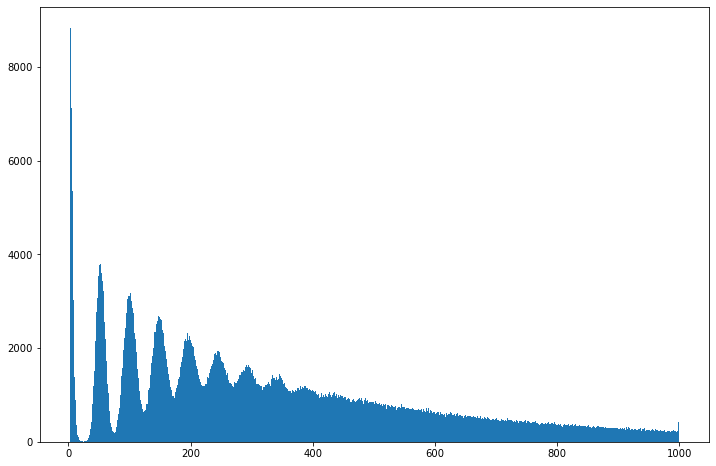

In [8]:
k_mer_dict = k_mer_dump_and_hist(10, skip_threshold_val=2, last_count_val=1000)

### k = 15

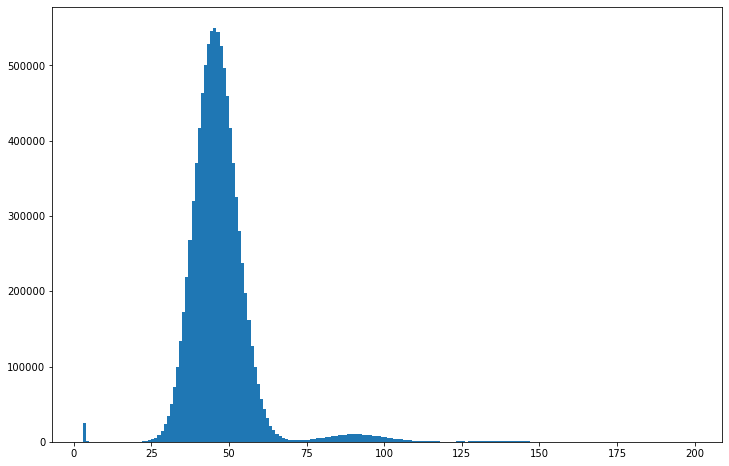

In [8]:
k_mer_dict = k_mer_dump_and_hist(15, skip_threshold_val=2, last_count_val=200)

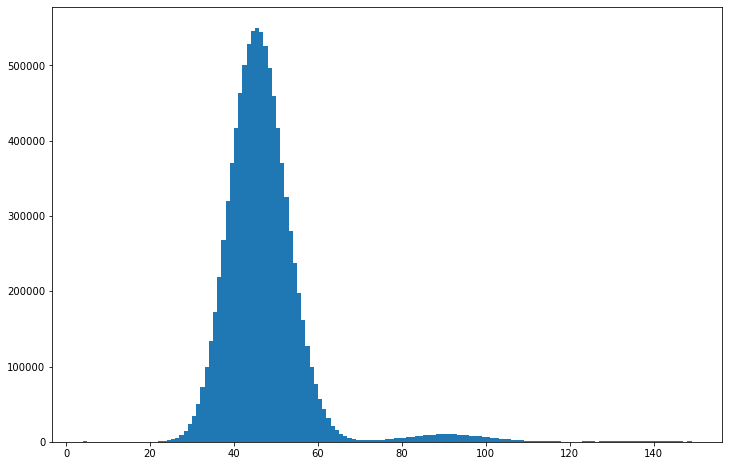

In [9]:
k_mer_hist(k_mer_dict, skip_threshold_val=3, last_count_val=150)

### k = 18

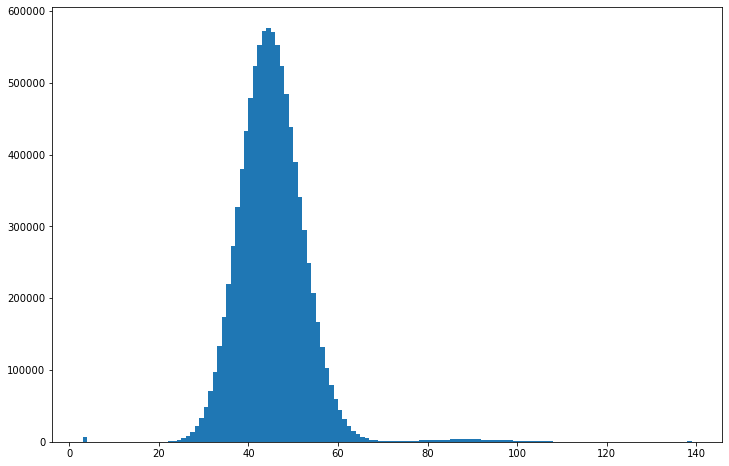

In [10]:
k_mer_dict = k_mer_dump_and_hist(18, skip_threshold_val=2, last_count_val=140)

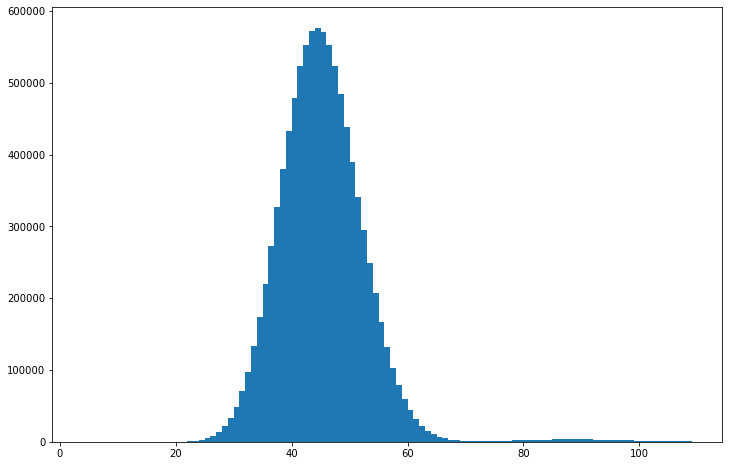

In [11]:
k_mer_hist(k_mer_dict, skip_threshold_val=3, last_count_val=110)

### k = 20

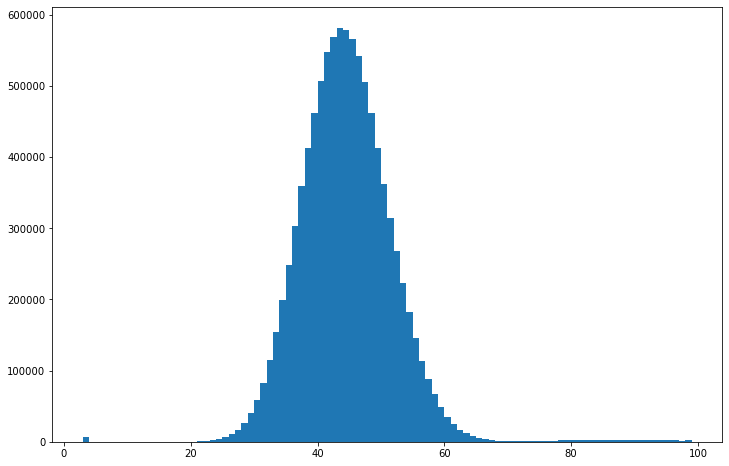

In [4]:
k_mer_dict = k_mer_dump_and_hist(20, skip_threshold_val=2, last_count_val=100)

### k = 24

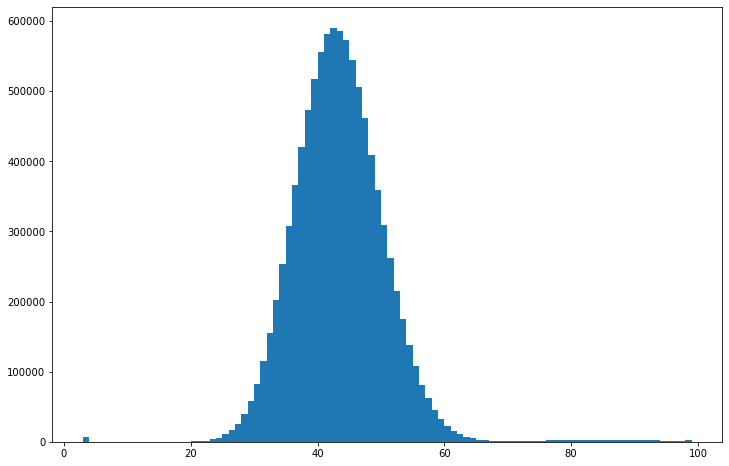

In [12]:
k_mer_dict = k_mer_dump_and_hist(24, skip_threshold_val=2, last_count_val=100)

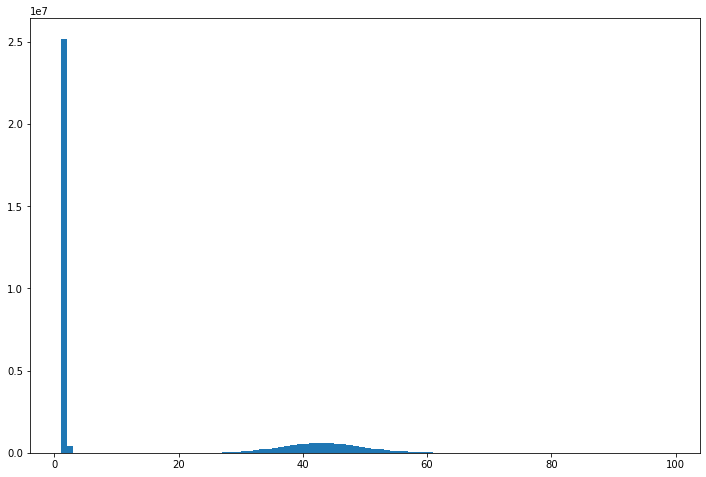

In [13]:
k_mer_dict = k_mer_dump_and_hist(24, skip_threshold_val=0, last_count_val=100)

### k = 30

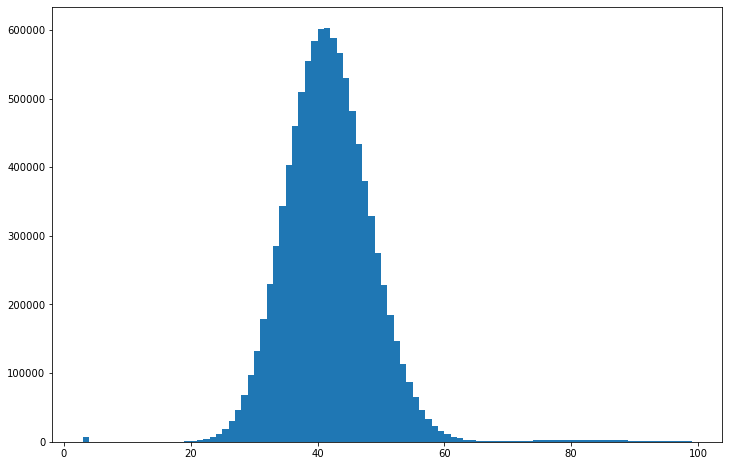

In [9]:
k_mer_dict = k_mer_dump_and_hist(30, skip_threshold_val=2, last_count_val=100)

In [ ]:
k_mer_dict_40 = k_mer_dump_and_hist(40, skip_threshold_val=2, last_count_val=80)

### k = 60

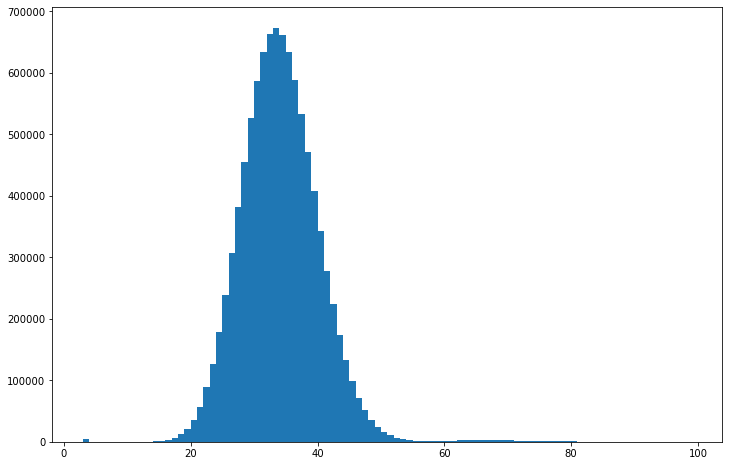

In [27]:
k_mer_dict_60 = k_mer_dump_and_hist(60, skip_threshold_val=2, last_count_val=80)

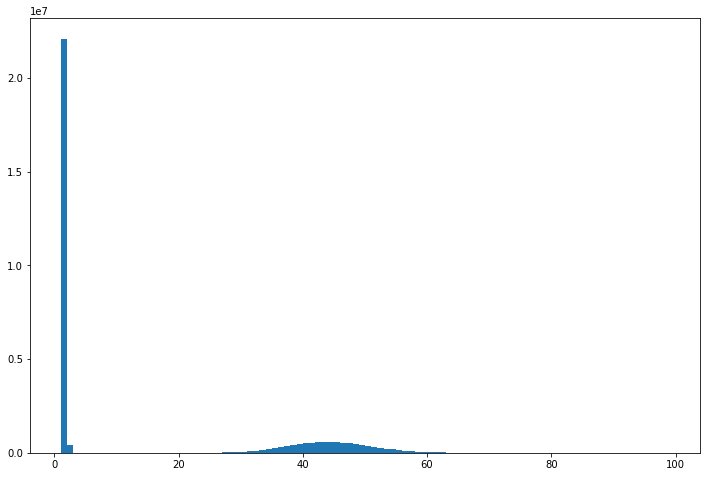

In [5]:
k_mer_hist(k_mer_dict, skip_threshold_val=0, last_count_val=100)

## Code for choosed k = 32

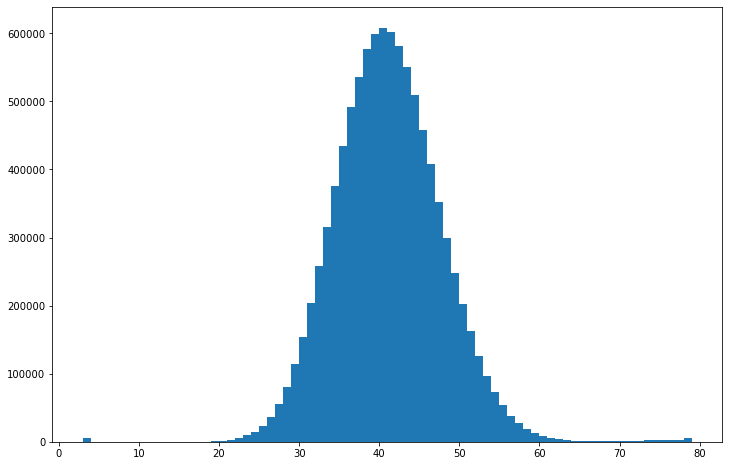

In [3]:
k_mer_dict = k_mer_dump_and_hist(32, path='salmonella/salmonella-enterica.reads.fna', skip_threshold_val=2, last_count_val=80)

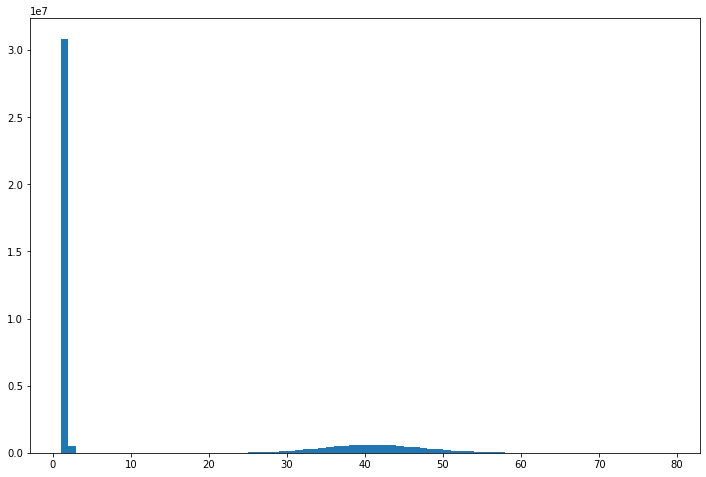

In [4]:
k_mer_hist(k_mer_dict, skip_threshold_val=0, last_count_val=80)

Proceed the variant file

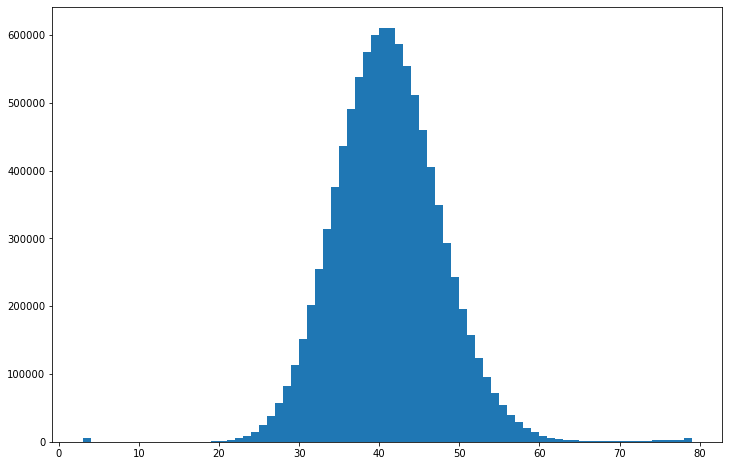

In [5]:
k_mer_dict_var = k_mer_dump_and_hist(32, path='salmonella/salmonella-enterica-variant.reads.fna', skip_threshold_val=2, last_count_val=80)

In [7]:
for k,v in k_mer_dict.items():
    print(k, v)
    break

GCGATTTAAGCCGCGTTTTCCGCGTCGGTGAA 1


## Search for unique k-mers: these k-mers probably have mutations

In [34]:
def get_uniq_items(dict1, dict2, ignore_value_less = 10) -> dict:
    dict_uniq = {}
    for key, value in dict1.items():
        if key not in dict2.keys() and value > ignore_value_less:
            dict_uniq[key] = value
    return dict_uniq

In [19]:
k_mer_uniq     = get_uniq_items(k_mer_dict,     k_mer_dict_var)
k_mer_uniq_var = get_uniq_items(k_mer_dict_var, k_mer_dict)

In [20]:
len(k_mer_uniq)

68

In [21]:
len(k_mer_uniq_var)

68

Unique k-mers: 68 and 68 - Very good!

In [29]:
i = -1
for k,v in k_mer_uniq.items():
    print(k,v)
    i += 1
    if i > 20:
        break

CTGCTCTACACCTAGCTTCTGGGCGAGTTTAC 46
GAGGTCGGAATCGAAGGTTTAACAACCCGTAA 42
ACACCTAGCTTCTGGGCGAGTTTACGGGTTGT 47
AGGCTGCTCTACACCTAGCTTCTGGGCGAGTT 45
GGCGAGTTTACGGGTTGTTAAACCTTCGATTC 44
TTTAACAACCCGTAAACTCGCCCAGAAGCTAG 38
CCGTAAACTCGCCCAGAAGCTAGGTGTAGAGC 39
TAAACTCGCCCAGAAGCTAGGTGTAGAGCAGC 39
GCGAGTTTACGGGTTGTTAAACCTTCGATTCC 44
AACTCGCCCAGAAGCTAGGTGTAGAGCAGCCT 40
TAGCTTCTGGGCGAGTTTACGGGTTGTTAAAC 47
GGTCGGAATCGAAGGTTTAACAACCCGTAAAC 42
GCTTCTGGGCGAGTTTACGGGTTGTTAAACCT 47
TTAACAACCCGTAAACTCGCCCAGAAGCTAGG 38
GAATCGAAGGTTTAACAACCCGTAAACTCGCC 45
GAAGGTTTAACAACCCGTAAACTCGCCCAGAA 41
TAACAACCCGTAAACTCGCCCAGAAGCTAGGT 38
GGGCGAGTTTACGGGTTGTTAAACCTTCGATT 44
CTGGGCGAGTTTACGGGTTGTTAAACCTTCGA 45
CGAGTTTACGGGTTGTTAAACCTTCGATTCCG 44
TAGGCTGCTCTACACCTAGCTTCTGGGCGAGT 45
GGTTTAACAACCCGTAAACTCGCCCAGAAGCT 38


We have mutation in each k-mer. Mutation length is less then k-mer / 3, so it can't be in the first and third parts of the k-mer (in the same k-mer). Let's find k-mer from second file with the same part of the genome (mutation in the same position).

In [ ]:
k_mer = k

In [32]:
for k, v in k_mer_uniq_var.items():
    if (k_mer[0:10] == k[0:10]) or (k_mer[-10:] == k[-10:]):
        print(k)

GGTTTAACAACCCGTCCCCTCGCCCAGAAGCT


In [33]:
k_mer

'GGTTTAACAACCCGTAAACTCGCCCAGAAGCT'

AAA -> CCC
So the second pair is:
TTT -> GGG

# Victory!

## P.S. 
1) Another way to find mutation (68 unique k-mers -> 2 mutations)

In [ ]:
k = 32
def find_genome_parts(changed_arr):
    genome_parts = []
    
    for init_elem in changed_arr:
        genome_part = init_elem
        
        break_needed = False
        for genome_parts_i in genome_parts:
            if genome_parts_i.find(init_elem) != -1:
                break_needed = True
                break
        if break_needed:
            break

        for i in range(k - 1):
            for elem in changed_arr:
                if genome_part[-(k-1):] == elem[0:(k-1)]:
                    genome_part += elem[-1]

        for i in range(k - 1):
            for elem in changed_arr:
                if genome_part[0:(k-1)] == elem[-(k-1):]:
                    genome_part = elem[0] + genome_part

        genome_parts.append(genome_part)
    return genome_parts
    
    
def get_mutations(changed_arr_1, changed_arr_2):
    genome_parts_1 = find_genome_parts(changed_arr_1)
    genome_parts_2 = find_genome_parts(changed_arr_2)
    
    print("Mutation pairs:\n")
    for genome_part_1 in genome_parts_1:
        for genome_part_2 in genome_parts_2:
            if genome_part_2.find(genome_part_1[0:k-1]) != -1:
                print(genome_part_1)
                print(genome_part_2)
                print("---")

get_mutations(changed_arr_1, changed_arr_2)

## Calculus
p : probability of read to overlap my k-mer \
X : number of reads overlapping a given k-mer \
N: total number of reads \
G : size of the genome (5M) \
r : lenghth of reads (250)

In [42]:
r = 250
G = 5e6
k = 30
e = 0.01

In [48]:
0.99 ** 10

0.9043820750088044

In [43]:
p = (r - k) / (G - r)

In [46]:
p_ef = p * ((1 - e) ** k)

In [47]:
p_ef

3.254844385127689e-05

ETC...